# ****_Красноок Юлія ФБ-32, Домашня робота 1_****

## ****Опис датасету:****

Цей датасет містить 5717 записів про набори даних на Kaggle. Кожен рядок відповідає одному датасету, а стовпці описують його характеристики: назву, популярність, метадані та активність користувачів.

title – назва датасету.

usability – рейтинг зручності (оцінка від Kaggle).

num_of_files – скільки файлів містить датасет.

types_of_files – які типи файлів (CSV, Excel тощо).

files_size – загальний розмір файлів.

vote_counts – кількість голосів (upvotes) від користувачів.

medal – нагорода за популярність (бронза, срібло, золото).

url_reference – посилання на сторінку датасету на Kaggle.

keywords – ключові слова / теги, пов’язані з темою датасету.

num_of_columns – скільки ознак (стовпців) у цьому датасеті.

views – кількість переглядів.

downloads – кількість завантажень.

download_per_view – співвідношення завантажень до переглядів.

date_created – дата створення датасету.

last_updated – дата останнього оновлення.

In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("Kaggle_Datasets.csv")
metadata = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Null Count": df.isnull().sum().values,
    "Data Type": df.dtypes.astype(str).values
})
print(metadata)
metadata.to_csv("metadata.csv", index=False, encoding="utf-8-sig")


               Column  Non-Null Count  Null Count Data Type
0               title            5717           0    object
1           usability            5717           0   float64
2        num_of_files            5384         333   float64
3      types_of_files            5450         267    object
4          files_size            5651          66    object
5         vote_counts            5717           0     int64
6               medal            5717           0    object
7       url_reference            5717           0    object
8            keywords            5099         618    object
9      num_of_columns            3049        2668   float64
10              views            5716           1   float64
11          downloads            5716           1   float64
12  download_per_view            5716           1   float64
13       date_created            5622          95    object
14       last_updated            5622          95    object


In [48]:
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
                                              title  usability  num_of_files  \
0               COVID-19 World Vaccination Progress       10.0           1.0   
1  Android smartphones high accuracy GNSS datasets         8.8         190.0   
2           All Trump's Twitter insults (2015-2021)       10.0           1.0   
3                  US Drought & Meteorological Data        9.4           3.0   
4                                Temperature change       10.0           2.0   

  types_of_files files_size  vote_counts    medal  \
0            CSV     35 KB           173   Silver   
1          other       1 GB           83   Bronze   
2            CSV    581 KB            51   Bronze   
3           JSON     748 MB           15   Bronze   
4            CSV     778 KB           32   Bronze   

                                       url_reference  \
0           /gpreda/covid-world-vaccination-progress   
1  /google/android-smartphones-high-accuracy-data...   
2    /a

In [49]:
import pandas as pd
import numpy as np

# Видаляємо пропуски
df_cleaned = df.dropna()
numeric_df = df_cleaned.select_dtypes(include=[np.number])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.to_csv("cleaned_dataset.csv", index=False)

In [50]:
df = pd.read_csv("cleaned_dataset.csv")
metadata = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Null Count": df.isnull().sum().values,
    "Data Type": df.dtypes.astype(str).values
})
print(metadata)

               Column  Non-Null Count  Null Count Data Type
0               title            1673           0    object
1           usability            1673           0   float64
2        num_of_files            1673           0   float64
3      types_of_files            1673           0    object
4          files_size            1673           0    object
5         vote_counts            1673           0     int64
6               medal            1673           0    object
7       url_reference            1673           0    object
8            keywords            1673           0    object
9      num_of_columns            1673           0   float64
10              views            1673           0   float64
11          downloads            1673           0   float64
12  download_per_view            1673           0   float64
13       date_created            1673           0    object
14       last_updated            1673           0    object


In [51]:
df = pd.read_csv("cleaned_dataset.csv")
col = "downloads"
data = df[col].to_numpy()
print(f"Дані беремо зі стовпця: {col}")

# Усічене середнє
sorted_data = np.sort(data)
cut = int(len(sorted_data) * 0.1)
trimmed_data = sorted_data[cut: len(sorted_data) - cut]

mean = np.mean(data)
trimmed_mean = np.mean(trimmed_data)
median = np.median(data)
variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)
mean_abs_dev = np.mean(np.abs(data - mean))
mad = np.median(np.abs(data - np.median(data)))

results = {
    "Середнє": [mean],
    "Усічене середнє (10%)": [trimmed_mean],
    "Медіана": [median],
    "Дисперсія": [variance],
    "Стандартне відхилення": [std_dev],
    "Середнє відхилення": [mean_abs_dev],
    "Абсолютне медіанне відхилення (MAD)": [mad]
}

df_stats = pd.DataFrame(results)
with open("statistics.csv", "w", encoding="utf-8") as f:
    f.write(f"Дані бралися зі стовпця: {col}\n")
    df_stats.to_csv(f, index=False)

Дані беремо зі стовпця: downloads


In [52]:
df = pd.read_csv("cleaned_dataset.csv")
col = "downloads"
data = df[col]
# Мін-Макс нормалізація
df[f"{col}_minmax"] = (data - data.min()) / (data.max() - data.min())
print(df[[col, f"{col}_minmax"]].head(10))
df.to_csv("normalized_dataset_min-max.csv", index=False)

   downloads  downloads_minmax
0      727.0          0.109684
1      141.0          0.021151
2     3079.0          0.465025
3      698.0          0.105303
4     2324.0          0.350959
5      957.0          0.144433
6     3067.0          0.463212
7      294.0          0.044267
8     3582.0          0.541018
9      282.0          0.042454


In [53]:
#нормалізація (середня)
df = pd.read_csv("cleaned_dataset.csv")
col = "downloads"
data = df[col]
df[f"{col}_zscore"] = (data - data.mean()) / data.std()
print(df[[col, f"{col}_zscore"]].head(10))
df.to_csv("normalized_dataset_avarage.csv", index=False)

   downloads  downloads_zscore
0      727.0         -0.257939
1      141.0         -0.683137
2     3079.0          1.448658
3      698.0         -0.278981
4     2324.0          0.900835
5      957.0         -0.091052
6     3067.0          1.439951
7      294.0         -0.572121
8     3582.0          1.813632
9      282.0         -0.580828


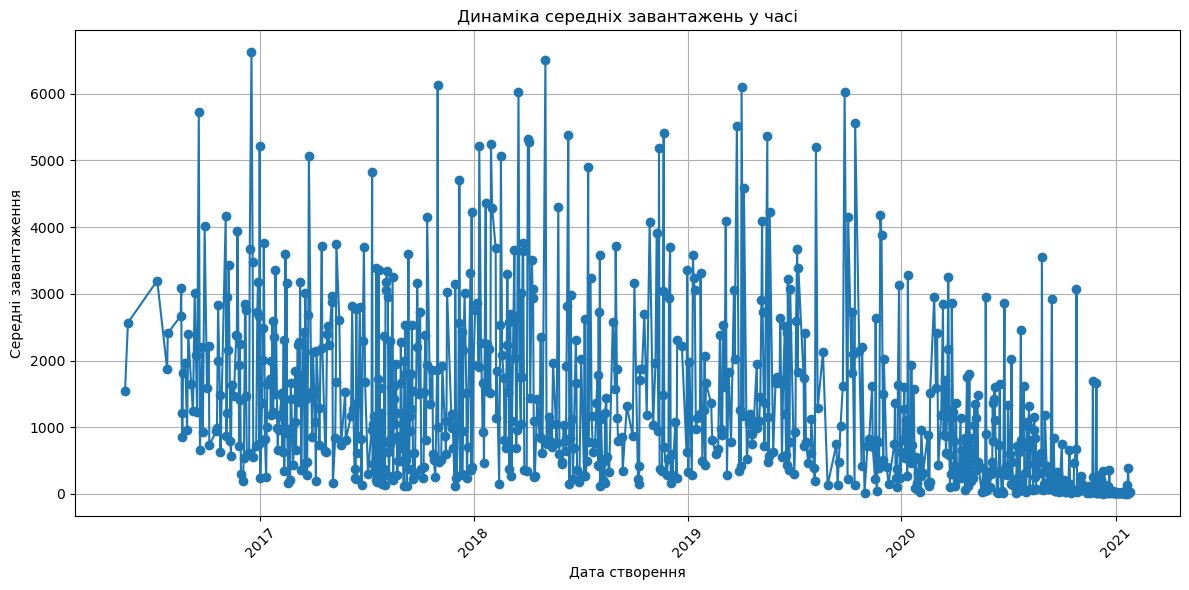

In [54]:
df = pd.read_csv("normalized_dataset_min-max.csv")
df["date_created"] = pd.to_datetime(df["date_created"], errors="coerce")
downloads_by_date = df.groupby(df["date_created"].dt.date)["downloads"].mean()
plt.figure(figsize=(12, 6))
plt.plot(downloads_by_date.index, downloads_by_date.values, marker="o", linestyle="-")
plt.title("Динаміка середніх завантажень у часі")
plt.xlabel("Дата створення")
plt.ylabel("Середні завантаження")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("line_downloads_over_time.png")
plt.show()

In [55]:
plt.figure(figsize=(8, 6))
df.groupby("medal")["downloads"].mean().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Середні завантаження за медалями")
plt.xlabel("Медаль")
plt.ylabel("Середні завантаження")
plt.savefig("bar_downloads_medal.png")
plt.close()

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df["views"], df["downloads"], alpha=0.5)
plt.title("Перегляди vs Завантаження")
plt.xlabel("Перегляди (views)")
plt.ylabel("Завантаження (downloads)")
plt.savefig("scatter_views_downloads_simple.png")
plt.close()